# Eng. Abdallah Dwikat, Elevvopath Intern, 24th of August 2025.
## Customer Segmentation for mall customers dataset using K Means.

## 1. Load Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\hp\Elevvopath\2) Customer_Segmentation_KMeans\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_31408\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## 2. Select features for clusters

In [12]:
X = df[['Annual Income (k$)',	'Spending Score (1-100)']].values
print(f"\nFeature matrix shape: {X.shape}")


Feature matrix shape: (200, 2)


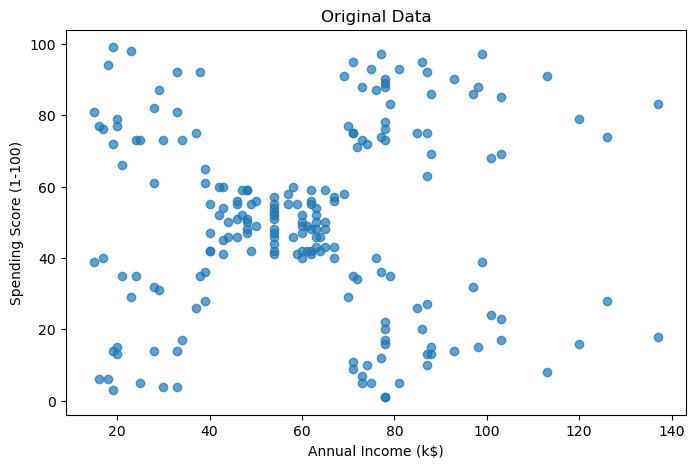

Data ready! Now let's build K-means from scratch...


In [13]:
# Visualize original data
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data')
plt.show()

print("Data ready! Now let's build K-means from scratch...")

## 3. Data Pre-processing

In [16]:
# K-Means Implementation
class SimpleKMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        
    def fit(self, X):
        # Step 1: Initialize centroids randomly
        np.random.seed(42)
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.k, replace=False)]
        
        print(f"Starting K-means with k={self.k}")
        
        for iteration in range(self.max_iters):
            # Step 2: Assign points to closest centroids
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)
            
            # Step 3: Update centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])
            
            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                print(f"Converged at iteration {iteration + 1}")
                break
                
            self.centroids = new_centroids
            
        return self
    
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

## 4. Elbow finds the ideal number of clusters. (maybe 3 not the best)

In [17]:
# Find optimal number of clusters using Elbow Method
print("\nFinding optimal k using Elbow Method...")

k_values = range(1, 8)
costs = []

for k in k_values:
    kmeans = SimpleKMeans(k=k, max_iters=50)
    kmeans.fit(X)
    
    # Calculate cost (within-cluster sum of squares)
    cost = sum(np.sum((X[kmeans.labels == i] - kmeans.centroids[i])**2) 
               for i in range(k))
    costs.append(cost)


Finding optimal k using Elbow Method...
Starting K-means with k=1
Converged at iteration 2
Starting K-means with k=2
Converged at iteration 9
Starting K-means with k=3
Converged at iteration 16
Starting K-means with k=4
Converged at iteration 19
Starting K-means with k=5
Converged at iteration 11
Starting K-means with k=6
Converged at iteration 5
Starting K-means with k=7
Converged at iteration 8


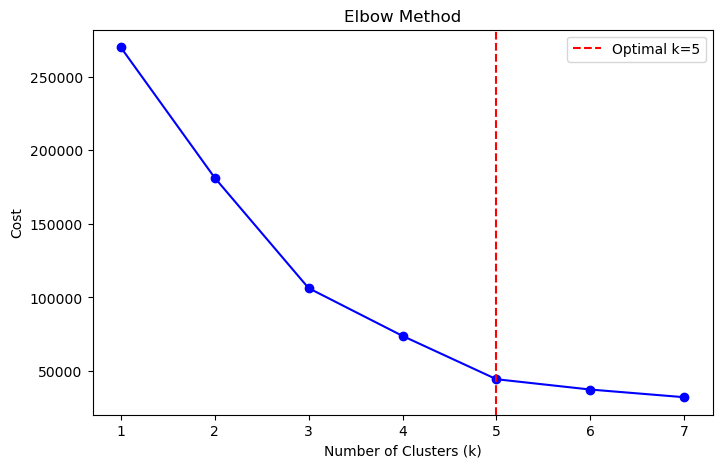

Optimal k appears to be 5


In [20]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.axvline(x=5, color='red', linestyle='--', label='Optimal k=5')
plt.legend()
plt.show()

print("Optimal k appears to be 5")

## 5. Modelling

In [21]:
# Run K-means with optimal k=5
print("\nRunning K-means with k=5...")
kmeans = SimpleKMeans(k=5, max_iters=100)
kmeans.fit(X)


Running K-means with k=5...
Starting K-means with k=5
Converged at iteration 11


## 6. Communication Results

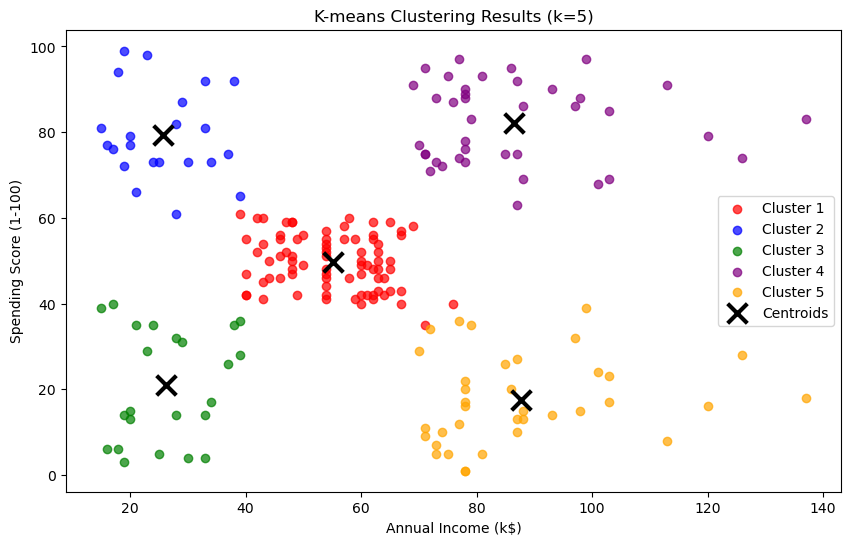

In [22]:
# Visualize results
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(10, 6))

for i in range(5):
    cluster_points = X[kmeans.labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i+1}', alpha=0.7)

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results (k=5)')
plt.legend()
plt.show()

In [25]:
# Analyze clusters
df['Cluster'] = kmeans.labels

print("\nCluster Analysis:")
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i+1} ({len(cluster_data)} customers):")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.0f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")

print("\nK-means implementation completed! 🎉")
print("We successfully segmented customers into 5 meaningful groups.")


Cluster Analysis:

Cluster 1 (80 customers):
  Average Age: 42.9
  Average Income: $55k
  Average Spending Score: 49.7

Cluster 2 (22 customers):
  Average Age: 25.3
  Average Income: $26k
  Average Spending Score: 79.4

Cluster 3 (23 customers):
  Average Age: 45.2
  Average Income: $26k
  Average Spending Score: 20.9

Cluster 4 (39 customers):
  Average Age: 32.7
  Average Income: $87k
  Average Spending Score: 82.1

Cluster 5 (36 customers):
  Average Age: 40.7
  Average Income: $88k
  Average Spending Score: 17.6

K-means implementation completed! 🎉
We successfully segmented customers into 5 meaningful groups.


# Eng. Abdallah Dwikat, Elevvopath Intern, 24th of August 2025.